# Занятие 7:
## Анализ данных: глубокое погружение

### `scipy`

Библиотека `scipy` содержит огромное количество научных алгоритмов общего назначения. В данной лабораторной работе мы рассмотрим алгоритмы связанные с МНК — методом наименьших квадратов.

#### Линейная регрессия

`scipy.stats.linregress` – функция специально предназначенная для линейной регрессии. Она принимает два аргумента: массивы`x` и `y` и выдаёт в качестве результата 5 значений: 

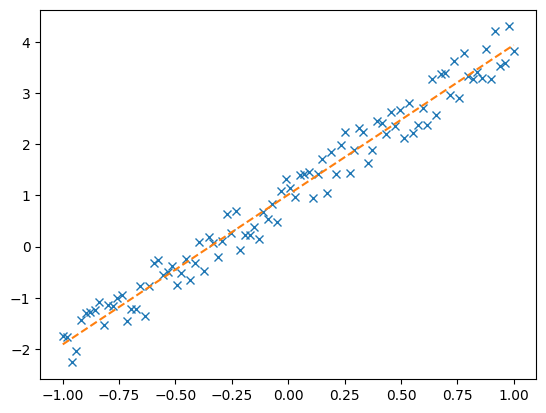

In [49]:
from scipy.stats import linregress
import numpy as np
from matplotlib import pyplot as plt

# создаём массивы данных
xs = np.linspace(-1, 1, 100)  # координаты x
k, b, err = 3, 1, .5  # задаём параметры линейной зависимости: наклон k, свободный коэффициент b, амплитуда добавленной ошибки err
ys = k * xs + b + err * (np.random.rand(xs.size) - 0.5) * 2

# вызываем функцию рассчитывающую линейную регрессию
# возвращаемые параметры (про r и p можно пока не задумываться): 
# slope, intercept – наклон и свободный коэффициент
# r – линейный коэффициент корреляции, показывающий качество описания данных моделью. Меняется в диапазоне [-1, 1],
# где 1 — идеальное попадание, -1 — идеальный провал
# p - вероятность того, что данные можно описать slope == 0
# se — стандартное отклонение полученного результата slope
slope, intercept, r, p, se = linregress(xs, ys)

# строим исходные данные
plt.plot(xs, ys, 'x')
# строим линию тренда
plt.plot(xs, xs * slope + intercept, '--')
plt.show()

#### Аппроксимация произвольной кривой

Подобрать параметры произвольной модельной функции можно с помощью функции `scipy.optimize.curve_fit`.

Функция `curve_fit` чрезвычайно сложна: она покрывает большое количество методов оптимизации, каждый со своими деталями и особенностями. Здесь мы разберём самые простые применения.

Допустим, у нас есть набор данных

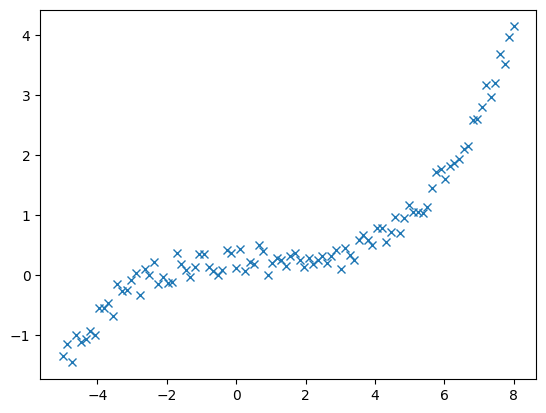

In [43]:
import numpy as np
xs, ys = np.loadtxt('datasets/notes07.txt').T
plt.plot(xs, ys, 'x')

Мы хотим аппроксимировать эти данные полиномиальной функцией третьей степени. Для этого зададим функцию следующего вида:
```Python
def f_app(x, *args):
    return ...
```
Важно! Для того чтобы передать функцию в `curve_fit`, у неё должна быть строго определённая сигнатура. Первым аргументом в функцию передаётся numpy-вектор точек на которых функция должна быть вычислена, т.е. `x`. Далее должны следовать параметры, которые мы хотим аппроксимировать. То есть если мы хотим задать параметризованный полином третьей степени, вид функции должен быть:

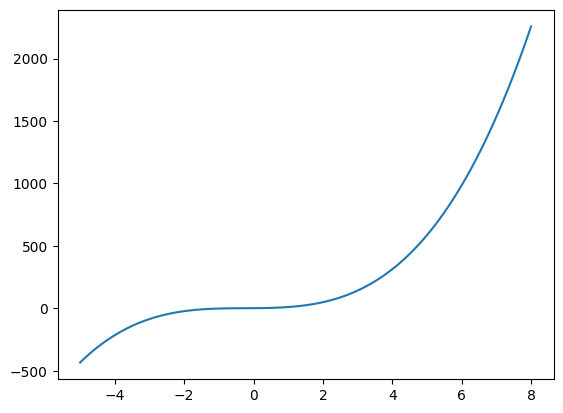

In [44]:
import numpy as np

# задаём функцию
def f_app(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# строим её график с произвольно выбранными параметрами
xs = np.linspace(-5, 8, 100)
plt.plot(xs, f_app(xs, 4, 3, 2, 1))

Видим, что с произвольно выбранными параметрами вид функции в целом похож на данные, которые мы хотим аппроксимировать, хотя и масштаб совсем не тот. Это значит что выбранные нами произвольно `a == 4; b == 3; c == 2; d == 1` годятся в качестве затравочных (начальных) параметров аппроксимации.

Мы, наконец, дошли до использования функции `curve_fit`. Минимальный набор передаваемых в неё параметров это:
* модельная функция
* точки `x`
* точки `y`
* начальное значение параметров модельной функции

При этом возвращает функция `curve_fit` оптимизированные значения параметров и матрицу ковариации в виде двух `numpy`-массивов.

In [45]:
# запускаем оптимизацию. элементы списка [4, 3, 2, 1] будут переданы в функцию f_app
# в той же последовательности в качестве аргументов следующих за xs
popt, pcov = curve_fit(f_app, xs, ys, [4, 3, 2, 1])
# оптимизация проведена. popt – вектор содержащий оптимальные значения параметров, pcov – матрица ковариации.
# для того чтобы извлечь из матрицы ковариации стандартные отклонения (ошибки) оптимизированных параметров, 
# нужно взять корни диагональных элементов
print('Результаты оптимизации параметров a, b, c, d:')
for ii in range(popt.size):
    print('%.04f ± %.04f' % (popt[ii], np.sqrt(pcov[ii, ii])))

Результаты оптимизации параметров a, b, c, d:
0.0097 ± 0.0003
-0.0185 ± 0.0019
0.0040 ± 0.0083
0.2303 ± 0.0241


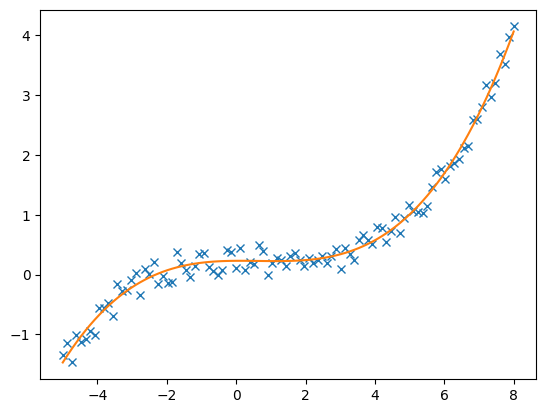

In [46]:
# построим результат оптимизации на графике:
plt.plot(xs, ys, 'x')
# запись f_app(xs, *popt) распаковывает массив и передаёт в функцию в виде параметров,
# f_app(xs, *popt) эквивалентна f_app(xs, popt[0], popt[1], popt[2], popt[3])
plt.plot(xs, f_app(xs, *popt))